In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym  # Library for Symbolic Math


In [2]:
# Objective function
def objective(x):
    return (x + 3) ** 2

# Derivative of the objective function
def derivative(x):
    return 2 * (x + 3)


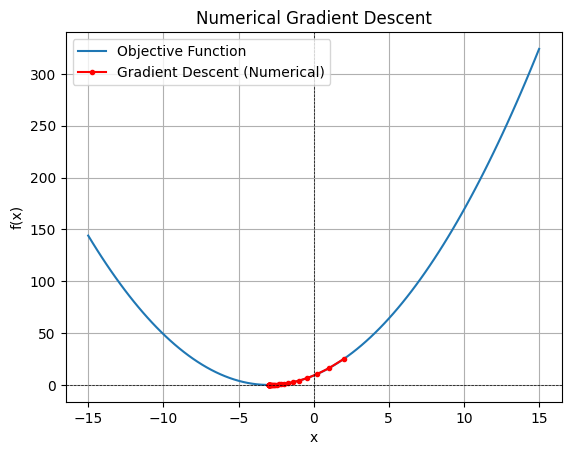

In [3]:
# Gradient descent implementation (numerical)
def gradient_descent(alpha, start, max_iter):
    x_list = []
    x = start
    x_list.append(x)
    for i in range(max_iter):
        gradient = derivative(x)
        x = x - (alpha * gradient)
        x_list.append(x)
    return x_list

# Parameters for gradient descent
alpha = 0.1  # Step size
start = 2    # Starting point
max_iter = 30  # Limit on iterations

# Perform numerical gradient descent
X = gradient_descent(alpha, start, max_iter)
X_arr = np.array(X)

# Plot the objective function
x_cordinate = np.linspace(-15, 15, 100)
plt.plot(x_cordinate, objective(x_cordinate), label='Objective Function')

# Plot the points found by gradient descent
plt.plot(X_arr, objective(X_arr), '.-', color='red', label='Gradient Descent (Numerical)')

# Final touches to the plot
plt.title('Numerical Gradient Descent')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()


In [4]:
# Symbolic gradient calculation
x = sym.symbols('x')
expr = (x + 3) ** 2.0
grad = sym.Derivative(expr, x)
print("Symbolic derivative: {}".format(grad.doit()))


Symbolic derivative: 2.0*(x + 3)**1.0


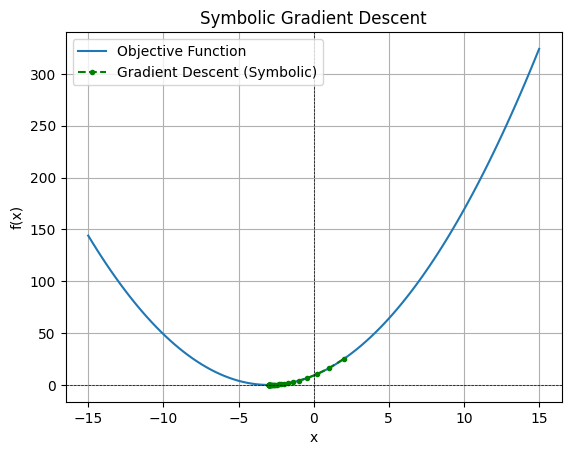

In [5]:
# Gradient descent implementation (symbolic)
def gradient_descent1(expr, alpha, start, max_iter):
    x_list = []
    x_val = start
    x_list.append(x_val)
    
    # Compute the gradient (symbolic derivative) just once outside the loop
    grad = sym.Derivative(expr, x).doit().simplify()
    
    # Perform the gradient descent iterations
    for i in range(max_iter):
        grad_value = grad.subs(x, x_val)  # Evaluate the gradient at x_val
        
        # Convert the symbolic result to a float (numeric value) for computations
        grad_value = float(grad_value)
        
        # Update x_val using the gradient descent formula
        x_val = x_val - (alpha * grad_value)
        x_list.append(x_val)
    
    return x_list

# Perform symbolic gradient descent
X_sym = gradient_descent1(expr, alpha, start, max_iter)
X_sym_arr = np.array(X_sym)

# Plot the objective function
x_cordinate = np.linspace(-15, 15, 100)
plt.plot(x_cordinate, objective(x_cordinate), label='Objective Function')

# Plot the points found by symbolic gradient descent
plt.plot(X_sym_arr, objective(X_sym_arr), '.--', color='green', label='Gradient Descent (Symbolic)')

# Final touches to the plot
plt.title('Symbolic Gradient Descent')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()
